# Import libraries and files

In [ ]:
import numpy as np
import nibabel.processing as nibp
import os
import nibabel as nib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz.ZIP, period.


In [ ]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz.ZIP, period.


In [ ]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz.ZIP, period.


In [ ]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz.ZIP, period.


In [ ]:
!unzip gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz or
        gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz.ZIP, period.


# Make masks

Make gray matter mask

In [ ]:
# load functional data
#filepath_func = 'sub-01_task-sherlockPart1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
#func = nib.load(filepath_func)
#print(func.affine)

In [ ]:
# load functional data
filepath_func = 'gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz'
func = nib.load(filepath_func)
print(func)
print(func.affine)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (49, 62, 48, 156)
affine: 
[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  49  62  48 156   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        3.        3.        3.3       2.0000007 1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 8
cal_max         : 709.4388
cal_min         : -83.836174


In [ ]:
# load functional data
filepath_anat = 'gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz'
anat = nib.load(filepath_anat)
print(anat.shape)
#print(func.affine)

(274, 384, 384)


In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

#print(func.get_fdata()[0,:,:])
#show_slices([func.get_fdata()[140, :, :],
#             func.get_fdata()[:, 140, :],
#             func.get_fdata()[:, :, 140]])

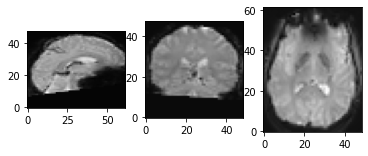

In [ ]:
show_slices([func.get_fdata()[24, :, :, 0],
             func.get_fdata()[:, 24, :, 0],
             func.get_fdata()[:, :, 24, 0]])

In [ ]:
## load gray matter
#filepath_gm = './sub-01_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz'
#gm = nib.load(filepath_gm)
#print(gm.affine)

In [ ]:
# load gray matter
filepath_gm = 'gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz'
gm = nib.load(filepath_gm)
print(gm.affine)
print(gm.shape)

[[ 6.93359315e-01  4.50425558e-02  7.98166469e-02 -1.16284210e+02]
 [-3.23181227e-02  6.55866504e-01 -1.15482718e-01 -6.84598312e+01]
 [-9.06430706e-02  1.10701263e-01  6.51718795e-01 -1.61474640e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(274, 384, 384)


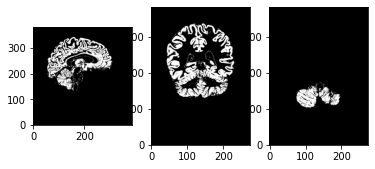

In [ ]:
show_slices([gm.get_fdata()[140, :, :],
             gm.get_fdata()[:, 140, :],
             gm.get_fdata()[:, :, 140]])

In [ ]:
# resize gray matter
func0 = func.slicer[:,:,:,0]
gm_funcSize=nibp.resample_from_to(gm, func0)
print(gm_funcSize.affine)

[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]


In [ ]:
# discretize gray matter
gm_values = gm_funcSize.get_fdata()
gm_mask = (gm_values>0.1)

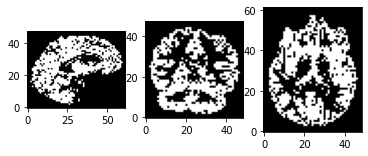

In [ ]:
show_slices([gm_mask[24, :, :],
             gm_mask[:, 24, :],
             gm_mask[:, :, 24]])

Make mask for regions of no interest ("confounds mask")

In [ ]:
# load white matter and csf
#filepath_wm = 'sub-01_space-MNI152NLin2009cAsym_label-WM_probseg.nii.gz'
#wm = nib.load(filepath_wm)
#print(wm.affine)
#filepath_csf = 'sub-01_space-MNI152NLin2009cAsym_label-CSF_probseg.nii.gz'
#csf = nib.load(filepath_csf)
#print(csf.affine)

In [ ]:
# load white matter and csf
filepath_wm = 'gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz'
wm = nib.load(filepath_wm)
print(wm.affine)
filepath_csf = 'gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz'
csf = nib.load(filepath_csf)
print(csf.affine)

[[ 6.93359315e-01  4.50425558e-02  7.98166469e-02 -1.16284210e+02]
 [-3.23181227e-02  6.55866504e-01 -1.15482718e-01 -6.84598312e+01]
 [-9.06430706e-02  1.10701263e-01  6.51718795e-01 -1.61474640e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 6.93359315e-01  4.50425558e-02  7.98166469e-02 -1.16284210e+02]
 [-3.23181227e-02  6.55866504e-01 -1.15482718e-01 -6.84598312e+01]
 [-9.06430706e-02  1.10701263e-01  6.51718795e-01 -1.61474640e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
# resize white matter and csf
wm_funcSize=nibp.resample_from_to(wm, func0)
print(wm_funcSize.affine)
csf_funcSize=nibp.resample_from_to(csf, func0)
print(csf_funcSize.affine)

[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]
[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]


In [ ]:
# discretize white matter and csf and make confounds mask
wm_values = wm_funcSize.get_fdata()
csf_values = csf_funcSize.get_fdata()
confounds_values = (wm_values+csf_values)/2
confounds_mask = (confounds_values>0.1)

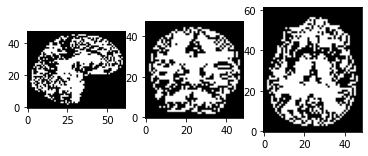

In [ ]:
show_slices([confounds_mask[24, :, :],
             confounds_mask[:, 24, :],
             confounds_mask[:, :, 24]])

# Extract functional data

In [ ]:
# Extract functional data from masks
func_values = func.get_fdata()
func_reshaped = np.reshape(func_values,[func.shape[0]*func.shape[1]*func.shape[2],func.shape[3]])
gm_reshaped = np.reshape(gm_mask,-1)
confounds_mask_reshaped = np.reshape(confounds_mask,-1)
diff = gm_reshaped & confounds_mask_reshaped
gm_reshaped_c = gm_reshaped ^ diff
confounds_mask_reshaped_c = confounds_mask_reshaped ^ diff
func_gm = func_reshaped[gm_reshaped_c,:] # these are the functional data in gray matter
func_confounds = func_reshaped[confounds_mask_reshaped_c,:] # these are the functional data in the regions of no interest
print(func_gm.shape)
print(func_confounds.shape)

(19734, 156)
(22686, 156)


In [ ]:
print(func_values.shape)
print(func.shape[0],func.shape[1],func.shape[2],func.shape[3])

(49, 62, 48, 156)
49 62 48 156


# cVAE model

In [ ]:
from typing import List, Callable, Union, Any, TypeVar, Tuple
# from torch import tensor as Tensor

Tensor = TypeVar('torch.tensor')

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class VanillaVAE(nn.Module):


    def __init__(self,in_channels: int,latent_dim: int,hidden_dims: List = None) -> None:
        super(VanillaVAE, self).__init__()

        self.latent_dim = latent_dim

        modules = []
        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 128]

        # Build Encoder
        for h_dim in hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels=h_dim,
                              kernel_size= 3, stride= 2, padding  = 1),
                    nn.BatchNorm1d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(hidden_dims[-1]*10, latent_dim)
        self.fc_var = nn.Linear(hidden_dims[-1]*10, latent_dim)

        # Build Decoder
        modules = []

        self.decoder_input = nn.Linear(latent_dim, hidden_dims[-1] * 10)

        hidden_dims.reverse()

        for i in range(1, (len(hidden_dims) - 1)):
            if i//2==0:
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose1d(hidden_dims[i],
                                       hidden_dims[i + 1],
                                       kernel_size=3,
                                       stride = 2,
                                       padding=1,
                                       output_padding=1),
                        nn.BatchNorm1d(hidden_dims[i + 1]),
                        nn.LeakyReLU())
                )
            else:
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose1d(hidden_dims[i],
                                       hidden_dims[i + 1],
                                       kernel_size=3,
                                       stride = 2,
                                       padding=1,
                                       output_padding=0),
                        nn.BatchNorm1d(hidden_dims[i + 1]),
                        nn.LeakyReLU())
                )



        self.decoder = nn.Sequential(*modules)

        self.final_layer = nn.Sequential(
                            nn.ConvTranspose1d(hidden_dims[-1],
                                               hidden_dims[-1],
                                               kernel_size=3,
                                               stride=2,
                                               padding=1,
                                               output_padding=1),
                            nn.BatchNorm1d(hidden_dims[-1]),
                            nn.LeakyReLU(),
                            nn.Conv1d(hidden_dims[-1], out_channels= 1,
                                      kernel_size= 3, padding= 0),
                            nn.Tanh())
           #out_channels

    def encode(self, input: Tensor) -> List[Tensor]:
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes.
        :param input: (Tensor) Input tensor to encoder [N x C x H x W]
        :return: (Tensor) List of latent codes
        """
        result = self.encoder(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        # of the latent Gaussian distribution
        mu = self.fc_mu(result)
        log_var = self.fc_var(result)

        return [mu, log_var]

    def decode(self, z: Tensor) -> Tensor:
        """
        Maps the given latent codes
        onto the image space.
        :param z: (Tensor) [B x D]
        :return: (Tensor) [B x C x H x W]
        """
        result = self.decoder_input(z)
        result = result.view(-1,128,20)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def reparameterize(self, mu: Tensor, logvar: Tensor) -> Tensor:
        """
        Reparameterization trick to sample from N(mu, var) from
        N(0,1).
        :param mu: (Tensor) Mean of the latent Gaussian [B x D]
        :param logvar: (Tensor) Standard deviation of the latent Gaussian [B x D]
        :return: (Tensor) [B x D]
        """
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, input_z: Tensor, input_s: Tensor) -> List[Tensor]:
        mu_z, log_var_z = self.encode(input_z)
        mu_s, log_var_s = self.encode(input_s)
        z = self.reparameterize(mu, log_var)
        return  [self.decode(z), input, mu, log_var]

    def loss_function(self,
                      *args,
                      ) -> dict:
        """
        Computes the VAE loss function.
        KL(N(\mu, \sigma), N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}
        :param args:
        :param kwargs:
        :return:
        """
        recons = args[0]
        input = args[1]
        mu = args[2]
        log_var = args[3]

        #kld_weight = kwargs['M_N'] # Account for the minibatch samples from the dataset
        recons_loss =F.mse_loss(recons, input)


        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim = 1), dim = 0)

        loss = recons_loss + kld_loss
        return {'loss': loss, 'Reconstruction_Loss':recons_loss.detach(), 'KLD':-kld_loss.detach()}

    def sample(self,
               num_samples:int,
               current_device: int) -> Tensor:
        """
        Samples from the latent space and return the corresponding
        image space map.
        :param num_samples: (Int) Number of samples
        :param current_device: (Int) Device to run the model
        :return: (Tensor)
        """
        z = torch.randn(num_samples,
                        self.latent_dim)

        z = z.to(current_device)

        samples = self.decode(z)
        return samples

    def generate(self, x: Tensor) -> Tensor:
        """
        Given an input image x, returns the reconstructed image
        :param x: (Tensor) [B x C x H x W]
        :return: (Tensor) [B x C x H x W]
        """

        return self.forward(x)[0]

In [ ]:
model = VanillaVAE(1,1280)

In [ ]:
model

VanillaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv1d(1, 32, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv1d(32, 64, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv1d(128, 128, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
  )
  (fc_mu): Linear(in_features=1

In [ ]:
# optimizer
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# data split
#from sklearn.model_selection import train_test_split
#training, remaining = train_test_split(func_gm, test_size=0.4, random_state=42)
#validating, testing = train_test_split(remaining, test_size=0.5, random_state=42)

In [ ]:
# dataloading 
train_dataloader = torch.utils.data.DataLoader(func_gm, batch_size=64,
                                             shuffle=True, num_workers=1)
#val_dataloader = torch.utils.data.DataLoader(validating, batch_size=64,
#                                             shuffle=True, num_workers=1)
#test_dataloader = torch.utils.data.DataLoader(testing, batch_size=64,
#                                             shuffle=True, num_workers=1)

In [ ]:
for data in train_dataloader:
  #print(data.shape)
  inputs = data.unsqueeze(1)
  inputs = inputs.double()
  #print(inputs.shape)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
train_image = []

for epoch in range(5):  # loop over the dataset multiple times
    print('Epoch {}/{}'.format(epoch, 4))
    print('-' * 10)

    running_loss = 0.0
    reconstruction_loss = 0.0
    running_KLD = 0.0
    running_corrects = 0
    val_loss = 0.0
    val_reconstruction_loss = 0.0
    val_KLD = 0.0
    val_corrects = 0

    # Iterate over data.
    for data in train_dataloader:

        inputs = data.unsqueeze(1).float()
        inputs = inputs.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # encoder + decoder
        [outputs, _, mu, log_var] = model(inputs)
        _, preds = torch.max(outputs, 1)
        #print(preds)
        loss = model.loss_function(outputs, inputs, mu, log_var)

        # backward + optimize
        loss['loss'].backward()
        optimizer.step()

        # print statistics
        running_loss += loss['loss']
        reconstruction_loss += loss['Reconstruction_Loss']
        running_KLD += loss['KLD']
        #running_corrects += torch.sum(preds == labels.squeeze())
        #running_corrects += (preds == labels).float().sum()
        #print(running_loss)
        #print(reconstruction_loss)
        #print(KLD)
        #print(running_corrects)
        if epoch == 4:
            train_image.append([data,outputs,loss])
    epoch_loss = running_loss / func_gm.shape[0]
    epoch_reconstruction_loss = reconstruction_loss / func_gm.shape[0]
    epoch_KLD = running_KLD / func_gm.shape[0]
    #epoch_val_loss = val_loss / validating.shape[0]
    #epoch_val_reconstruction_loss = val_reconstruction_loss / validating.shape[0]
    #epoch_val_KLD = val_KLD / validating.shape[0]
    #epoch_acc = running_corrects.float() / training.shape[0]
    print('Training Loss: {:.4f} Training Reconstruction Loss: {:.4f} Training KLD {:.4f}'.format(epoch_loss, epoch_reconstruction_loss, epoch_KLD))
    #print('Val Loss: {:.4f} Val Reconstruction Loss: {:.4f} Val KLD {:.4f}'.format(epoch_val_loss, epoch_val_reconstruction_loss, epoch_val_KLD))
    print('')
    print()

print('Finished Training')

Epoch 0/4
----------


TypeError: ignored

In [ ]:
img1 = val_image[0][0].detach().cpu().numpy()[0].reshape([func.shape[0],func.shape[1],func.shape[2],func.shape[3]])

ValueError: ignored

tensor([[361.9641, 346.9181, 347.5112,  ..., 358.1633, 359.4222, 353.0915],
        [359.2648, 362.8114, 362.9567,  ..., 357.1707, 356.7228, 360.1242],
        [398.7621, 402.0303, 409.9225,  ..., 412.9608, 408.2279, 414.5949],
        ...,
        [347.0634, 347.0028, 345.8045,  ..., 342.8267, 344.2067, 348.3101],
        [323.2294, 321.5590, 318.5933,  ..., 318.1818, 328.7854, 321.0869],
        [375.6665, 377.1191, 379.9395,  ..., 371.5752, 376.8165, 375.0734]],
       dtype=torch.float64)


TypeError: ignored

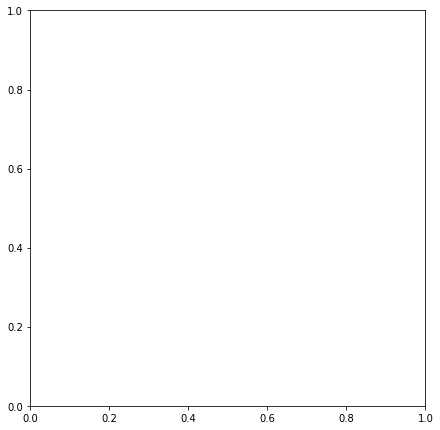

In [ ]:
print(val_image[0][0])
plt.figure(figsize = (16,16))
plt.subplot(2,2,1)
plt.imshow(val_image[0][0].detach().cpu().numpy()[:,0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(val_image[0][1].detach().cpu().numpy()[:,0],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(val_image[1][0].detach().cpu().numpy()[:,0],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(val_image[1][1].detach().cpu().numpy()[:,0],cmap='gray')